<a href="https://colab.research.google.com/github/montassar-ML/project/blob/main/montassarbz_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


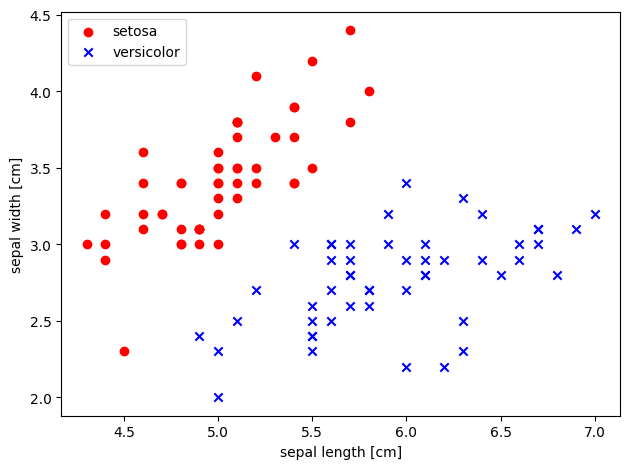

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and sepal width
X = df.iloc[0:100, [0, 1]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./images/02_06.png', dpi=300)
plt.show()

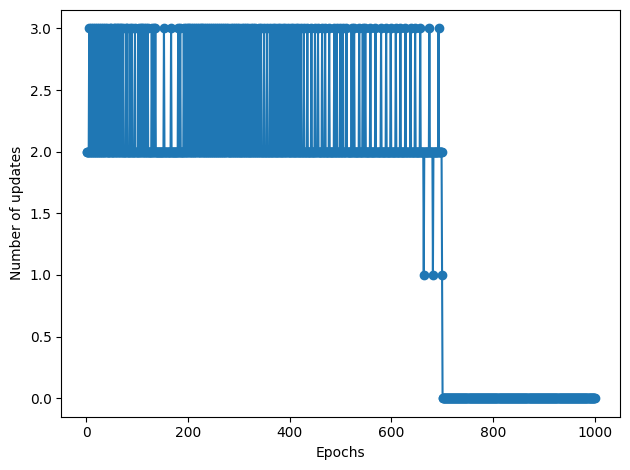

In [4]:
ppn = Perceptron(eta=0.1, n_iter=1000)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

ppn1 = Perceptron(eta=0.1, n_iter=500)

ppn1.fit(X, y)

ppn2 = Perceptron(eta=0.1, n_iter=200)

ppn2.fit(X, y)

ppn3 = Perceptron(eta=0.1, n_iter=100)

ppn3.fit(X, y)

ppn4 = Perceptron(eta=0.1, n_iter=50)

ppn4.fit(X, y)

ppn5 = Perceptron(eta=0.1, n_iter=20)

ppn5.fit(X, y)

ppn6 = Perceptron(eta=0.1, n_iter=10)

ppn6.fit(X, y)
#plt.plot(range(1, len(ppn1.errors_) + 1), ppn1.errors_, marker='o')
#plt.xlabel('Epochs')
#plt.ylabel('Number of updates')

#plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
#plt.show()

In [5]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

<ipython-input-5-a13da887a678>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
<ipython-input-5-a13da887a678>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


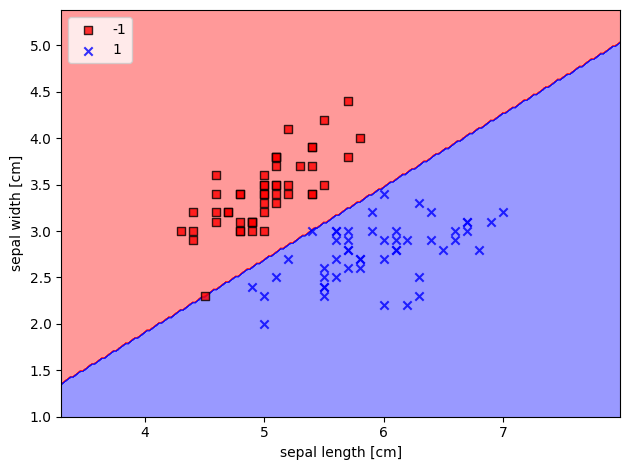


 This is the linear function with weights found by our algorithm for 1000 iterations: : 
-20.140000000000235x1 + 15.799999999999814x2 + -24.799999999999944


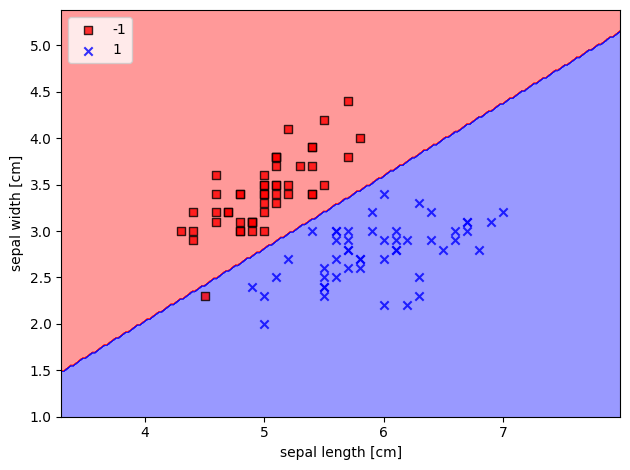


 This is the linear function with weights found by our algorithm for 500 iterations: : 
-18.32000000000015x1 + 14.339999999999842x2 + -20.19999999999996


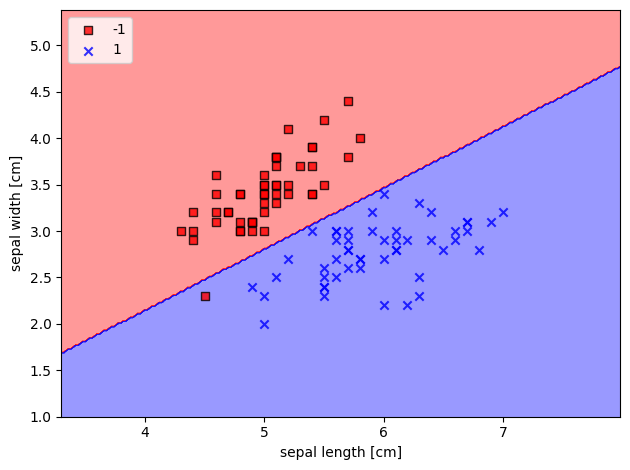


 This is the linear function with weights found by our algorithm for 200 iterations: : 
-16.259999999999945x1 + 10.719999999999924x2 + -8.000000000000004


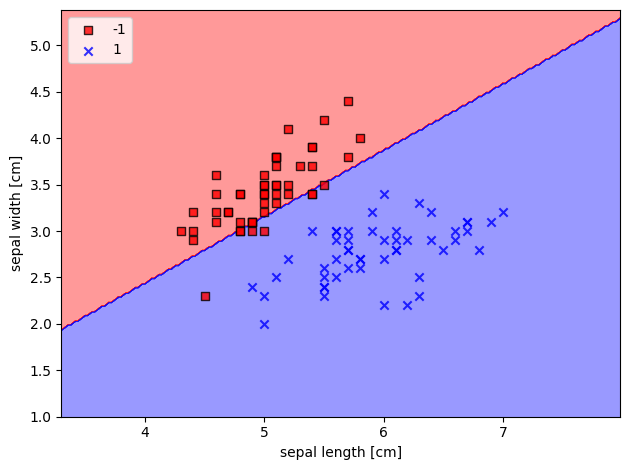


 This is the linear function with weights found by our algorithm for 100 iterations: : 
-11.379999999999967x1 + 8.139999999999986x2 + -4.800000000000002


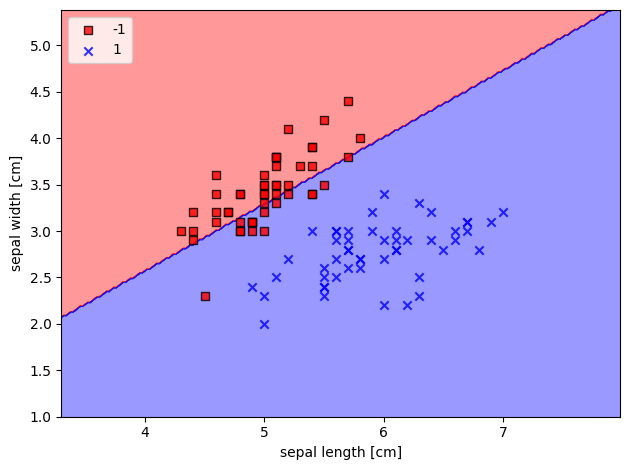


 This is the linear function with weights found by our algorithm for 50 iterations: : 
-7.779999999999998x1 + 5.600000000000004x2 + -2.4


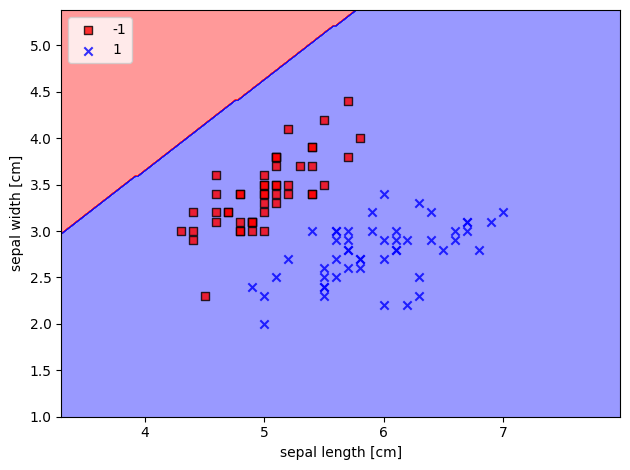


 This is the linear function with weights found by our algorithm for 20 iterations: : 
-3.2800000000000002x1 + 3.2000000000000015x2 + -0.8


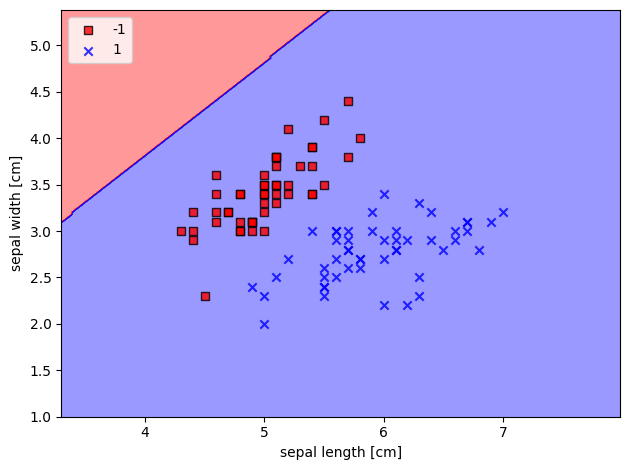


 This is the linear function with weights found by our algorithm for 10 iterations: 
-1.6599999999999997x1 + 1.680000000000001x2 + -0.4000000000000001


In [13]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

print("\n This is the linear function with weights found by our algorithm for " + str(ppn.n_iter) + " iterations: : ")
print(str(ppn.w_[2]) + "x1 + " + str(ppn.w_[1]) + "x2 + " + str(ppn.w_[0]))

plot_decision_regions(X, y, classifier=ppn1)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

print("\n This is the linear function with weights found by our algorithm for " + str(ppn1.n_iter) + " iterations: : ")
print(str(ppn1.w_[2]) + "x1 + " + str(ppn1.w_[1]) + "x2 + " + str(ppn1.w_[0]))
plot_decision_regions(X, y, classifier=ppn2)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

print("\n This is the linear function with weights found by our algorithm for " + str(ppn2.n_iter) + " iterations: : ")
print(str(ppn2.w_[2]) + "x1 + " + str(ppn2.w_[1]) + "x2 + " + str(ppn2.w_[0]))

plot_decision_regions(X, y, classifier=ppn3)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

print("\n This is the linear function with weights found by our algorithm for " + str(ppn3.n_iter) + " iterations: : ")
print(str(ppn3.w_[2]) + "x1 + " + str(ppn3.w_[1]) + "x2 + " + str(ppn3.w_[0]))
plot_decision_regions(X, y, classifier=ppn4)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

print("\n This is the linear function with weights found by our algorithm for " + str(ppn4.n_iter) + " iterations: : ")
print(str(ppn4.w_[2]) + "x1 + " + str(ppn4.w_[1]) + "x2 + " + str(ppn4.w_[0]))

plot_decision_regions(X, y, classifier=ppn5)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

print("\n This is the linear function with weights found by our algorithm for " + str(ppn5.n_iter) + " iterations: : ")
print(str(ppn5.w_[2]) + "x1 + " + str(ppn5.w_[1]) + "x2 + " + str(ppn5.w_[0]))
plot_decision_regions(X, y, classifier=ppn6)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

print("\n This is the linear function with weights found by our algorithm for " + str(ppn6.n_iter) + " iterations: ")
print(str(ppn6.w_[2]) + "x1 + " + str(ppn6.w_[1]) + "x2 + " + str(ppn6.w_[0]))